# Homework 2 (100 Points)

The goal of this homework is to get more practice with pandas and get practice with clustering on various datasets.


## Exercise 1 - (60 points)

This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap 



In [2]:
import pandas as pd
import folium
from folium.plugins import HeatMap


In [3]:
# Read the listing price file
# path = "C:/Users/tt2ma/Desktop/2022-Fall/CS506/HW2/homework-2-TT159/listings.csv"
listing = pd.read_csv('listings.csv')
# listing_price.head()

# origin_price = listing['price']

# caculate the mean price
mean_price = listing.groupby(['latitude', 'longitude'])['price'].mean()
mean_price = mean_price.to_frame().reset_index().values.tolist()

# create the NYC base map
basemap = folium.Map(
    location = [40.693943, -73.985880],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Mean Listing Price Heatmap',
)

HeatMap(mean_price).add_to(basemap)

# generate HTML file
basemap.save('index.html')

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\3172050931.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv')


b) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap from a). Comment on any differences you observe. - (5 points )



In [4]:
mean = listing['price'].mean()
std = listing['price'].std()
# norm_price = (listing['price'] - mean) / std
# print(norm_price)
listing['price'] = listing['price'].apply(lambda x: (x - mean) / std)
# print(listing['price'])

norm_price = listing.groupby(['latitude', 'longitude'])['price'].mean()
norm_price = norm_price.to_frame().reset_index().values.tolist()

basemap = folium.Map(
    location = [40.693943, -73.985880],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Mean Listing Price Heatmap',
)

HeatMap(norm_price).add_to(basemap)
basemap.save('NormPriceMap.html')

-> your answer here

The shape of the heatmap is not exactly the same. In addition, after normalization, the borders of each color in the heatmap are not so clear, it looks like blurred and diffused. We will find that the red area in the heatmap is relatively reduced after normalization, if we zoom in a little.


c) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap from a). Comment on any differences you observe.  - (5 points)



In [5]:
import sklearn
from sklearn.preprocessing import MinMaxScaler # This transformation is often used as an alternative to zero mean, unit variance scaling. 
# MinMaxScaler 归一到[0,1]; MaxAbsScaler 归一到[-1,1]

# read origin listing price and reshape it
listing = pd.read_csv('listings.csv')
# minmax_price = listing['price'] # 类型是Series，没有reshape方法，需要用.values
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# minmax_price = origin_price.values.reshape(-1, 1) # 或者用reshape(len(minmax_price), 1)
minmax_price = listing['price'].values.reshape(-1, 1)

scaler = MinMaxScaler()
minmax_price = scaler.fit_transform(minmax_price)
# print(minmax_price)
listing['price'] = minmax_price

minmax_price = listing.groupby(['latitude', 'longitude'])['price'].mean()
minmax_price = minmax_price.to_frame().reset_index().values.tolist()

# create the NYC base map
basemap = folium.Map(
    location = [40.693943, -73.985880],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Mean Listing Price Heatmap',
)

HeatMap(minmax_price).add_to(basemap)
basemap.save('MinMaxPriceMap.html')

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\2082933403.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv')


-> your answer here

After MinMaxScaler normalization, in general, the heatmap shape is similar. At the default zoom size, almost the same as index.html. However, if you zoom in a little, you will find that the boundaries of each area in heatmap are clearer after normalization.

d) Plot a bar chart of the average price (un-normalized) per room type. Briefly comment on the relation between price and room type. - (2.5 points)


C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\567082015.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv')


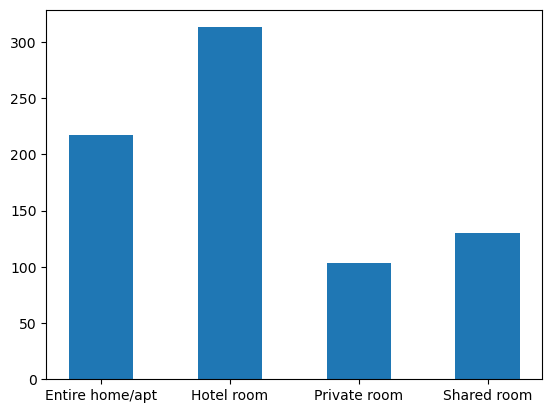

In [6]:
from matplotlib import pyplot as plt

listing = pd.read_csv('listings.csv')
room_price = listing.groupby(['room_type'])['price'].mean()
room_price = room_price.to_frame().reset_index() # reset_index()将其行格式重新整理好。重新设立index为0,1....，而不是每个group的名字作为行的index
# print(room_price)

data = room_price['price'].values.tolist()
labels = room_price['room_type'].values.tolist()
# print(len(room_price))
# print(labels)
plt.bar(range(len(room_price)), data, width = 0.5, tick_label = labels)
plt.show()

-> your answer here

Hotel room has the highest average price, followed by entire home/apt, and private rooms have the lowest price.

e) Plot on the NYC map the top 10 most expensive listings - (2.5 points)

In [7]:

listing = pd.read_csv('listings.csv')
# print(listing.describe()) # count: 37713

basemap = folium.Map(
    location = [40.693943, -73.985880],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Top 10 most expensive listings',
)

# remove duplicate data based on ['latitude', 'longitude', 'price']
# listing.drop_duplicates(subset=['latitude', 'longitude', 'price'], keep='last', inplace=True)
# print(listing.describe()) # count: 37545

# In Piazza, Proff said no need to remove duplicate. Thus there will only display 8 spots (3 duplicate)
top10_price = pd.DataFrame(listing.sort_values(['price'], ascending = False))
# print(top10_price.describe())  # count: 37545

top10_price_geo = top10_price[['latitude', 'longitude']].values.tolist()
# print(top10_price_geo[0]) # latitude, longitude
# print(top10_price_geo)


# top 10 most expensive
for i in range(10):
    # print(top10_price_geo[i])
    folium.Marker(
        location=top10_price_geo[i],
        icon=folium.Icon(color='black')
        ).add_to(basemap)

basemap.save('Top10Price.html')


C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\1866577877.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv')


f) Plot on the NYC map the top 10 most reviewed listings - (2.5 points)


In [8]:
listing = pd.read_csv('listings.csv')
# listing.head()

basemap = folium.Map(
    location = [40.693943, -73.985880],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Top 10 most expensive listings',
)

# listing.drop_duplicates(subset=['latitude', 'longitude', 'number_of_reviews'], keep='last', inplace=True)
# print(listing.describe()) # count: 37571

top10_review = pd.DataFrame(listing.sort_values(['number_of_reviews'], ascending = False))
top10_review_geo = top10_review[['latitude', 'longitude']].values.tolist()
# print(top10_review_geo[0]) # latitude, longitude

# top 10 most reviewed
for i in range(10):
    # print(top10_review_geo[i])
    folium.Marker(
        location=top10_review_geo[i],
        icon=folium.Icon(color='black')
        ).add_to(basemap)

basemap.save('Top10Review.html')

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\3308934051.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv')


g) Plot on the NYC map the top 10 most available listings - (2.5 points)

In [9]:
listing = pd.read_csv('listings.csv')
# listing.head()

basemap = folium.Map(
    location = [40.693943, -73.985880],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Top 10 most expensive listings',
)

# listing.drop_duplicates(subset=['latitude', 'longitude', 'availability_365'], keep='last', inplace=True)
# print(listing.describe()) # count: 37594

top10_available = pd.DataFrame(listing.sort_values(['availability_365'], ascending = False))
top10_available_geo = top10_available[['latitude', 'longitude']].values.tolist()

# top 10 most available
for i in range(10):
    # print(top10_available_geo[i])
    folium.Marker(
        location = top10_available_geo[i],
        icon = folium.Icon(color='black')
        ).add_to(basemap)

basemap.save('Top10Available.html')

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\2561248204.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv')


h) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. - (10 points)


In [10]:
from sklearn.cluster import KMeans
from folium import plugins

listing = pd.read_csv('listings.csv') # 37713 samples
data = listing[['latitude', 'longitude', 'price', 'number_of_reviews']] # 4 features
data= data.to_numpy() # Convert the DataFrame to a NumPy array.
# print(data)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
listing['labels'] = kmeans.labels_ #输出原始数据的聚类后的标签值
# listing.labels.value_counts() # 5 clusters: 0 (30860); 1 (23); 2 (783); 3 (5948); 4 (99) 

# NYC map
location_list = listing[['latitude', 'longitude']].values.tolist()
basemap = folium.Map(location = [40.693943, -73.985880], zoom_start = 11)
# for point in range(0, 100):
#     folium.Marker(location_list[point], popup=listing['labels'][point]).add_to(basemap)
# basemap.save('5clusters.html')


# Assign different color to different cluster
def ClusterColors(listing):
    if listing['labels'] == 0:
        return 'green'
    elif listing['labels'] == 1:
        return 'blue'
    elif listing['labels'] == 2:
        return 'red'
    else:
        return 'darkblue'

listing["color"] = listing.apply(ClusterColors, axis=1)
listing.head()

# plot clusters
marker_cluster = plugins.MarkerCluster().add_to(basemap)

for point in range(0, len(location_list)):
    folium.Marker(
        location = location_list[point], 
        popup = 'Cluster: ' + str(listing['labels'][point]), 
        icon = folium.Icon(color=listing["color"][point], icon_color='white', icon='home') #, angle=0, prefix='fa')
        ).add_to(marker_cluster)

marker_cluster.save('5clusters.html')

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\527770349.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv') # 37713 samples


i) You should see points in the same cluster all over the map - briefly explain why that is. - (2.5 points)

-> your answer here

Using the KMeans method to cluster data, it largely depends on the initial value of the centroids. The KMeans method will calculate the Euclidean distance between each data point and the current centroids through continuous iteration, and assign each data point to the closest cluster. It will eventually converge. Thus, finally, some points will in the same cluster.

j) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. - (5 points)

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_8248\3275779486.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv('listings.csv') # 37713 samples


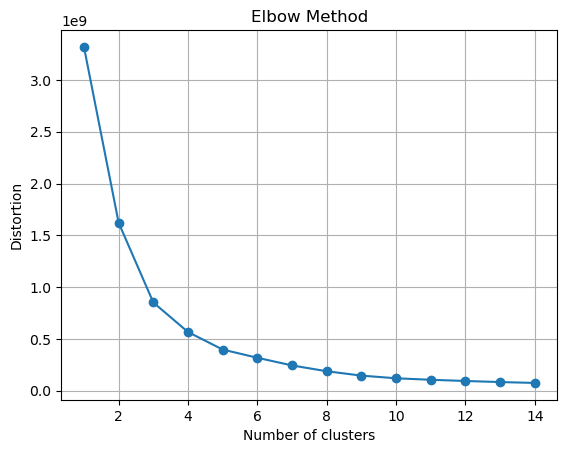

In [11]:
listing = pd.read_csv('listings.csv') # 37713 samples
data = listing[['latitude', 'longitude', 'price', 'number_of_reviews']] # 4 features

distortion = []
cluster_num = range(1,15)
for num in cluster_num:
    kmeans = KMeans(n_clusters=num, random_state=0)#, n_init=50, max_iter = 800)
    kmeans.fit(data)
    distortion.append(kmeans.inertia_)

plt.plot(cluster_num, distortion, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel('Distortion')
plt.grid()
plt.title('Elbow Method')
plt.show()

-> your answer here

I will select 6 as the number of cluster instead of 5, though I think 4,5,6 can all be set as the number of clusters. Because these points are the inflection points of the elbow curve, the curve tends to be stable after these points. 

k) Would you recommend normalizing the price and number of reviews? Briefly explain why. - (5 points)

-> your answer here

Yes, I will recommend normalizaing. Normalization can normalize different features to the same dimension, eliminating the problem of unbalanced proportions. At the same time, the influence of extreme values and outliers can be reduced. In addition, the search for the optimal solution can be accelerated (faster convergence).

l) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. - (5 points)


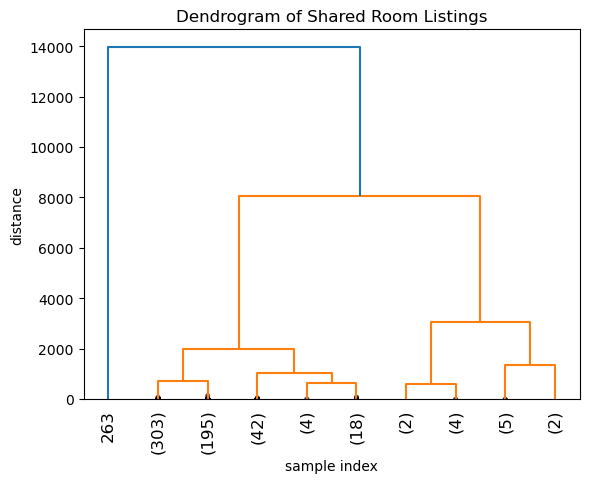

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.cluster.hierarchy import fcluster

listing = pd.read_csv('listings.csv', low_memory=False) # 37713 samples
# listing.room_type.value_counts() # 576

shared_room = listing[listing['room_type'] == 'Shared room']
# print(len(shared_room))

# plot the dendropgram
plt.title("Dendrogram of Shared Room Listings")
plt.xlabel('sample index')
plt.ylabel('distance')
Z = linkage(shared_room[['latitude', 'longitude', 'price']], method = 'ward')
# fcluster(Z, t=3, criterion='distance')
# dendro = dendrogram(Z)

dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()


m) briefly comment on what you observe from the structure of the dendrogram.  - (2.5 points)

-> your answer here

From the dendrogram, we can found that the maximum distance is 14000 and the x axis, smaple index, shows the number of data points the cluster contained in the last 10 merges. The cluster in blue is different from others and the three clusters on the left contain most of samples in the dataset. 

n) Normalize the `price` as in b) and repeat l) - (5 points)

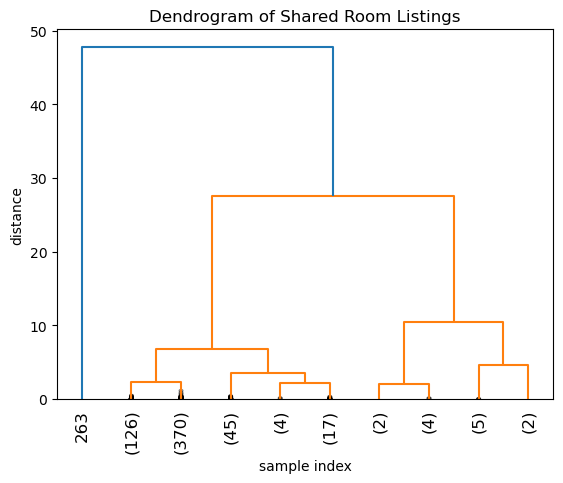

In [19]:

# normaliza as in b)
mean = listing['price'].mean()
std = listing['price'].std()
# replace the listing['price']
listing['price'] = listing['price'].apply(lambda x: (x - mean) / std)


# repeat I)
shared_room = listing[listing['room_type'] == 'Shared room'] 

plt.title("Dendrogram of Shared Room Listings")
plt.xlabel('sample index')
plt.ylabel('distance')
Z = linkage(shared_room[['latitude', 'longitude', 'price']], method = 'ward')
# fcluster(Z, t=3, criterion='distance')
# dendro = dendrogram(Z)

dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/).

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. - (10 points)

c:\Users\tt2ma\.conda\envs\CS506HMK1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


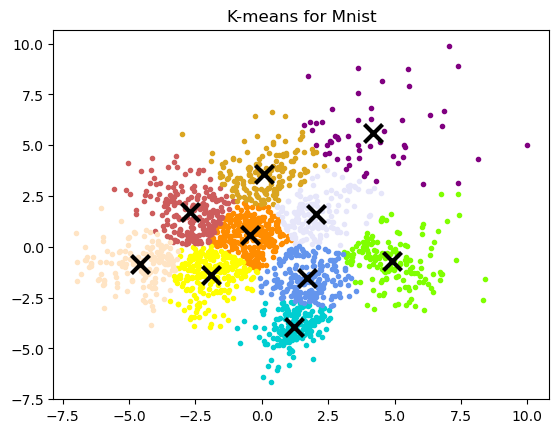

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np


mnist = load_digits()
# print(mnist)

# your code here
images = mnist.images
# print(images.shape)

# Display 10 digits images
# plt.figure(figsize=(10,5))
# plt.suptitle('handwritten_Image')
# for i in range(10):
#     plt.subplot(2,5,i+1), plt.title('image%i'%(i+1))
#     plt.imshow(images[i]), plt.axis('off')
# plt.show()

# Normalizing
data = scale(mnist.data) # 70000
# n_digits = len(np.unique(mnist.target)) # 识别出mnist里的每一个数字，其实就是cluster数目
# KMenas. mapping image data to 2D
data_2D = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=10)
kmeans.fit(data_2D)

label_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='black', zorder=10)
color_list=[ '#FF8C00', '#FFFF00','#00CED1', '#7FFF00', '#800080', '#CD5C5C', '#DAA520', '#E6E6FA', '#6495ED', '#FFE4C4']

# 10 digits
for i in range(10):
    x = data_2D[label_pred == i]
    plt.scatter(x[:, 0], x[:, 1], c=color_list[i], marker='.', label='label%s'%i)
plt.title('K-means for Mnist')
plt.axis('on')
plt.show()


b) what is the disagreement distance between the clustering you created above and the clustering created by the labels attached to each image? Briefly explain what this number means in this context. - (10 points)

In [42]:

data = scale(mnist.data) # 70000
feature = mnist.target # 784
disa_dist = 0
for i in range(data.shape[0]):
    for j in range(i + 1, data.shape[0]):
        if (feature[i] == feature[j] and label_pred[i] != label_pred[j]):
            disa_dist += 1
        elif (feature[i] != feature[j] and label_pred[i] == label_pred[j]):
            disa_dist += 1
        continue

print(disa_dist)

202241


The disagreement distance between the clustering is 202241 in this test case.

For each unique pair of points x and y, if the two clusterings disagree on which clusters points x & y belong to, then the disagreement distance plus 1. Otherwise, the distance does not change. After iterating over all unique pairs, finally, we accumulate this value, and the result represents the distance between this two clustering. (the clustering I created and the clustering created by the labels)

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (10 points)

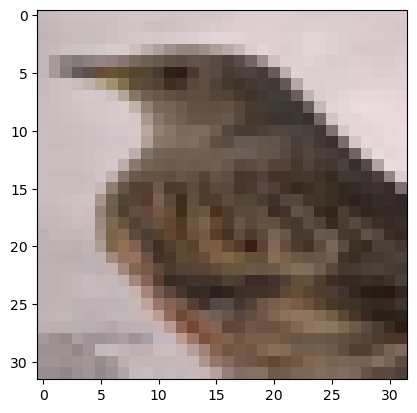

In [46]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

path_batch1 = "C:/Users/tt2ma/Desktop/2022-Fall/CS506/HW2/homework-2-TT159/cifar-10-python/cifar-10-batches-py/data_batch_1"
batch1 = unpickle(path_batch1)

# data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
data = batch1.get(b'data')
data = data.reshape(len(data), 3, 32, 32).transpose(0,2,3,1).astype("uint8")

# plot a random image
plt.imshow(data[18], interpolation='nearest')
plt.show()




d) This image is 32 x 32 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

c:\Users\tt2ma\.conda\envs\CS506HMK1\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


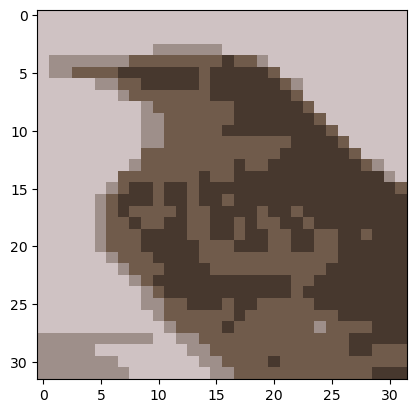

In [50]:
bird = data[18].reshape(1024, 3)

# The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
kmeans = KMeans(n_clusters = 4)
kmeans.fit(bird)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

modified_bird = np.zeros([32, 32, 3])
count = 0
for i in range(32):
    for j in range(32):
        modified_bird[i][j] = centroids[labels[count]]
        count = count + 1

modified_bird = modified_bird.astype("uint8")
plt.imshow(modified_bird, interpolation = "nearest")
plt.show()